In [1]:
import os
import sys, inspect
import numpy as np
import math
import scipy.io
import scipy.stats
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
from settings import MPIIGAZE_PATH
from data_processing.utils import mpii_face_gaze_path_wrapper, load_image_by_cv2, mpiigaze_path_wrapper
from data_processing.dataset_analysis import get_mpiigaze_data, get_processed_data_own_mpiigaze
from data_processing.own_data_analysis import get_own_dataset_data
from settings import DATA_PATH, RESULTS_PATH, FOR_THESIS_DIR

In [2]:
def get_mpiigaze_path(path):
    return os.path.join(MPIIGAZE_PATH, path)

## Try to open and show

In [3]:
path = get_mpiigaze_path("Data/Original/p01/day02/0020.jpg")

In [4]:
im = load_image_by_cv2(path)

In [5]:
print(im.shape)

(720, 1280, 3)


In [6]:
img = Image.fromarray(im, 'RGB')

In [7]:
# img.show()

## Get normalized

In [8]:
path = "Data/Normalized/p01/day02.mat"

In [9]:
path = os.path.join(MPIIGAZE_PATH, path)
matdata = scipy.io.loadmat(
    path, struct_as_record=False, squeeze_me=True)
data = matdata['data']

In [10]:
img = Image.fromarray(data.right.image[0], 'L')

In [11]:
# img.show()

## Get data about gaze and head pose

In [12]:
data.right.gaze[0]

array([-0.12259858,  0.09134563, -0.98824368])

In [13]:
data.left.gaze[0]

array([-0.11881702,  0.08861178, -0.98895423])

## 3G gaze target vs pixel coordinates

In [14]:
annotation = np.loadtxt(mpiigaze_path_wrapper("Data/Original/p00/day01/annotation.txt"))

In [15]:
theta_list = list()
phi_list = list()
x_list = list()
y_list = list()

for ann in annotation:
    gaze_target = ann[26:29]
    gaze_target = np.reshape(gaze_target, (-1, 1))
    tmp = gaze_target / np.linalg.norm(gaze_target)
    g_theta = math.degrees(np.arcsin((-1) * tmp[1].squeeze()))
    g_phi = math.degrees(np.arctan2((-1) * tmp[0].squeeze(), (-1) * tmp[2].squeeze()))
    
    coords = ann[24:26]
    
    print(f"gaze: ({g_theta}, {g_phi})\t coords: {coords}")
    theta_list.append(g_theta)
    phi_list.append(g_phi)
    x_list.append(coords[0])
    y_list.append(coords[1])
#     print(gaze_target.T)

gaze: (-37.524267512658454, 76.49838581635711)	 coords: [854. 270.]
gaze: (-64.5058465671731, 71.39197584225472)	 coords: [806. 630.]
gaze: (-46.861054061624785, 79.49951963940813)	 coords: [948. 467.]
gaze: (-41.56389170413497, -49.44440275642305)	 coords: [389. 166.]
gaze: (-79.8595437540148, -21.711763143280695)	 coords: [476. 758.]
gaze: (-49.479006576579195, 80.82006518857868)	 coords: [1005.  575.]
gaze: (-1.1230462445739833, 85.40353067200138)	 coords: [1140.   17.]
gaze: (-44.82641992671284, -71.3733567156306)	 coords: [ 94. 465.]
gaze: (-58.78084894406756, 56.242908231540305)	 coords: [664. 292.]
gaze: (-4.316793142356551, 85.14047586995213)	 coords: [1129.   51.]
gaze: (-14.462523103443635, 72.04682189793569)	 coords: [768.  76.]
gaze: (-33.919905099045586, 82.15940222794117)	 coords: [1024.  346.]
gaze: (-72.56387098545572, 30.881075878887454)	 coords: [585. 398.]
gaze: (-44.551500955370045, 85.27236863741888)	 coords: [1276.  743.]
gaze: (-47.014420418227395, 84.30861210375

gaze: (-74.50882207603452, -21.80692773057206)	 coords: [477. 457.]
gaze: (-51.1749337019075, -67.12216558946284)	 coords: [201. 448.]
gaze: (-50.63523000280543, 67.51912072543193)	 coords: [738. 294.]
gaze: (-80.43882233398827, 12.86758781551236)	 coords: [552. 724.]
gaze: (-70.62236720136913, -52.105110099885025)	 coords: [359. 607.]
gaze: (-39.57787273791901, 80.8060699704873)	 coords: [979. 388.]
gaze: (0.3980723200373298, 85.02919039791317)	 coords: [1.112e+03 1.000e+00]
gaze: (-34.8526750575025, -70.84470585804199)	 coords: [127. 306.]
gaze: (-51.66367391838517, -72.79216312930537)	 coords: [ 16. 689.]
gaze: (-80.50065280233724, 23.324092465278937)	 coords: [576. 770.]
gaze: (-32.52499465597418, -63.12679913485416)	 coords: [281. 185.]
gaze: (-78.46802725155287, 20.452807584865422)	 coords: [566. 597.]
gaze: (-28.743252908239377, -67.56608211801525)	 coords: [213. 197.]
gaze: (-3.0743615735974634, 84.91883540297519)	 coords: [1112.   37.]
gaze: (-13.183396075999228, 83.8945139562

In [16]:
pairs = [(theta_list, x_list),
        (theta_list, y_list),
        (phi_list, x_list),
        (phi_list, y_list)]

for pair in pairs:
    p = scipy.stats.pearsonr(pair[0], pair[1])[0]
    s = scipy.stats.spearmanr(pair[0], pair[1])[0]
    print(f"{p}\t{s}")
    print()

0.222743674607207	0.22545732581704664

-0.7916721143125867	-0.7644232780874304

0.9494968237321637	0.9976773728024108

-0.01585725339257079	-0.03546065559569292



# Data distribution - MPII Gaze

In [17]:
# figures_dir = os.path.join(RESULTS_PATH, "for_thesis")
# os.makedirs(figures_dir, exist_ok=True)

In [18]:
image_counter, x_coords, y_coords, df_untrusted = get_mpiigaze_data()

In [19]:
x = list(image_counter.keys())
y = list(image_counter.values())
y_percent = np.round(np.asarray(y) / np.sum(y) * 100.0, 2)

In [20]:
fig = plt.figure(figsize=(20, 10))
ax = sns.barplot(x=x, y=y)
ax.set_xlabel("Id osoby", fontsize=30)
ax.set_ylabel("Liczba zdjęć", fontsize=30)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.savefig(os.path.join(FOR_THESIS_DIR, "mpiigaze_person_distribution.png"))

In [21]:
df = pd.DataFrame({"Id osoby": x, "Liczba zdjęć": y, "Część zbioru (%)": y_percent})
df

,Id osoby,Liczba zdjęć,Część zbioru (%)
0,0,29961,14.11
1,1,24143,11.37
2,2,28007,13.19
3,3,35075,16.52
4,4,16831,7.93
5,5,16577,7.81
6,6,18448,8.69
7,7,14145,6.66
8,8,10701,5.04
9,9,7995,3.77


In [22]:
latex = df.to_latex(index=False).replace(".", ",")
with open(os.path.join(FOR_THESIS_DIR, "mpiigaze_person_dist.txt"), 'w') as file:
    file.write(latex)

In [23]:
fig = plt.figure(figsize=(20, 10))
ax = sns.distplot(x_coords, kde=False)
ax.set_xlabel("Znormalizowana wartość współrzędnej x", fontsize=30)
ax.set_ylabel("Liczba zdjęć", fontsize=30)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.savefig(os.path.join(FOR_THESIS_DIR, "mpiigaze_x_distribution.png"))

In [24]:
fig = plt.figure(figsize=(20, 10))
ax = sns.distplot(y_coords, kde=False)
ax.set_xlabel("Znormalizowana wartość współrzędnej y", fontsize=30)
ax.set_ylabel("Liczba zdjęć", fontsize=30)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.savefig(os.path.join(FOR_THESIS_DIR, "mpiigaze_y_distribution.png"))

In [25]:
df_untrusted = df_untrusted.groupby(["person_id", "day"]).count().reset_index()

In [26]:
df_untrusted = df_untrusted.rename({"person_id": "Id osoby", "day": "Dzień", "counter": "Liczba zdjęć"}, axis=1)
df_untrusted

,Id osoby,Dzień,Liczba zdjęć
0,02,21,12
1,07,02,36
2,07,04,35
3,07,06,135
4,07,07,12
5,07,11,55
6,07,12,163
7,07,13,32
8,07,14,46
9,07,15,104


In [27]:
latex = df_untrusted.to_latex(index=False).replace(".", ",")
with open(os.path.join(FOR_THESIS_DIR, "mpiigaze_anomalies.txt"), 'w') as file:
    file.write(latex)

In [28]:
np.sum(y) + np.sum(df_untrusted["Liczba zdjęć"].values)

213658

# Data distribution - own dataset

In [29]:
image_counter, face_detected_counter, x_coords, y_coords = get_own_dataset_data()

100%|██████████| 2548/2548 [00:00<00:00, 19220.79it/s]


In [30]:
def count_person_parts_number(people_ids, person_id):
    counter = 0
    for i in people_ids:
        if i == person_id:
            counter += 1
    return counter

In [31]:
y = list(image_counter.values())
detected = list(face_detected_counter.values())
y_percent = np.round(np.asarray(y) / np.sum(y) * 100.0, 2)
people_ids = list()
part_names = list()
for dir_name in image_counter.keys():
    if dir_name.startswith("ja_"):
        people_ids.append("A")
    elif dir_name.startswith("tata_"):
        people_ids.append("B")
    elif dir_name.startswith("mama_"):
        people_ids.append("C")
    elif dir_name.startswith("mma_"):
        people_ids.append("D")
    part_names.append(people_ids[-1] + "-" + 
                      str(count_person_parts_number(people_ids, people_ids[-1])))

In [32]:
df = pd.DataFrame({"Id osoby": people_ids, "Część": part_names, "Liczba zdjęć": y, "Liczba zdjęć z wykrytą twarzą": detected, 
                   "Część zbioru (%)": y_percent})
df = df.sort_values("Id osoby")
df = df.astype({"Liczba zdjęć": int, 
                "Liczba zdjęć z wykrytą twarzą": int, 
                "Część zbioru (%)": float})
images_number = np.sum(df["Liczba zdjęć"].values)
detected_number = np.sum(df["Liczba zdjęć z wykrytą twarzą"].values)
df = df.append([{"Id osoby": "",
                "Część": "Suma",
                "Liczba zdjęć": images_number,
                "Liczba zdjęć z wykrytą twarzą": detected_number,
                "Część zbioru (%)": 100.}], ignore_index=True)
df

,Id osoby,Część,Liczba zdjęć,Liczba zdjęć z wykrytą twarzą,Część zbioru (%)
0,A,A-1,5823,4205,28.18
1,A,A-2,1549,1549,7.50
2,A,A-3,1716,1708,8.30
3,A,A-4,1725,1725,8.35
4,B,B-1,2507,2501,12.13
5,B,B-2,2548,2548,12.33
6,C,C-1,2466,1609,11.93
7,D,D-1,2329,2327,11.27
8,,Suma,20663,18172,100.00


In [33]:
latex = df.to_latex(index=False).replace(".", ",")
with open(os.path.join(FOR_THESIS_DIR, "own_dataset_distribution.txt"), 'w') as file:
    file.write(latex)

### X and Y distribution

In [34]:
fig = plt.figure(figsize=(20, 10))
ax = sns.distplot(x_coords, kde=False)
ax.set_xlabel("Znormalizowana wartość współrzędnej x", fontsize=30)
ax.set_ylabel("Liczba zdjęć", fontsize=30)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.savefig(os.path.join(FOR_THESIS_DIR, "own_dataset_x_distribution.png"))

In [35]:
fig = plt.figure(figsize=(20, 10))
ax = sns.distplot(y_coords, kde=False)
ax.set_xlabel("Znormalizowana wartość współrzędnej y", fontsize=30)
ax.set_ylabel("Liczba zdjęć", fontsize=30)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.savefig(os.path.join(FOR_THESIS_DIR, "own_dataset_y_distribution.png"))

# MPII Gaze processed data

In [36]:
all_subjects = list(range(0, 7)) + list(range(8, 15)) + [24, 25]

In [37]:
right_images, left_images, poses, gazes, subject_ids = get_processed_data_own_mpiigaze(all_subjects)

In [38]:
subject_ids = subject_ids.astype(int)

In [39]:
own_len = np.sum(subject_ids == 24) + np.sum(subject_ids == 25)

In [40]:
mpiigaze_poses = poses[:len(poses) - own_len]
own_poses = poses[len(mpiigaze_poses):]

In [41]:
print(len(mpiigaze_poses) + len(own_poses))
print(len(poses))

42693
42693


In [51]:
def plot_dists(poses, file_name):
    fig = plt.figure(figsize=(60, 10))
    for i in range(6):
        ax = plt.subplot(1, 6, i + 1)
        x = poses[:, i]
        ax = sns.distplot(x)
        ax.set_xlabel(f"{i}. wartość w wektorze cech", fontsize=35)
        if i == 0:
            ax.set_ylabel("gęstość prawdopodobieństwa", fontsize=35)
        ax.tick_params(axis='x', labelsize=30)
        ax.tick_params(axis='y', labelsize=30)
        
    plt.savefig(os.path.join(FOR_THESIS_DIR, file_name), bbox_inches='tight')
    
    return fig

## Own dataset

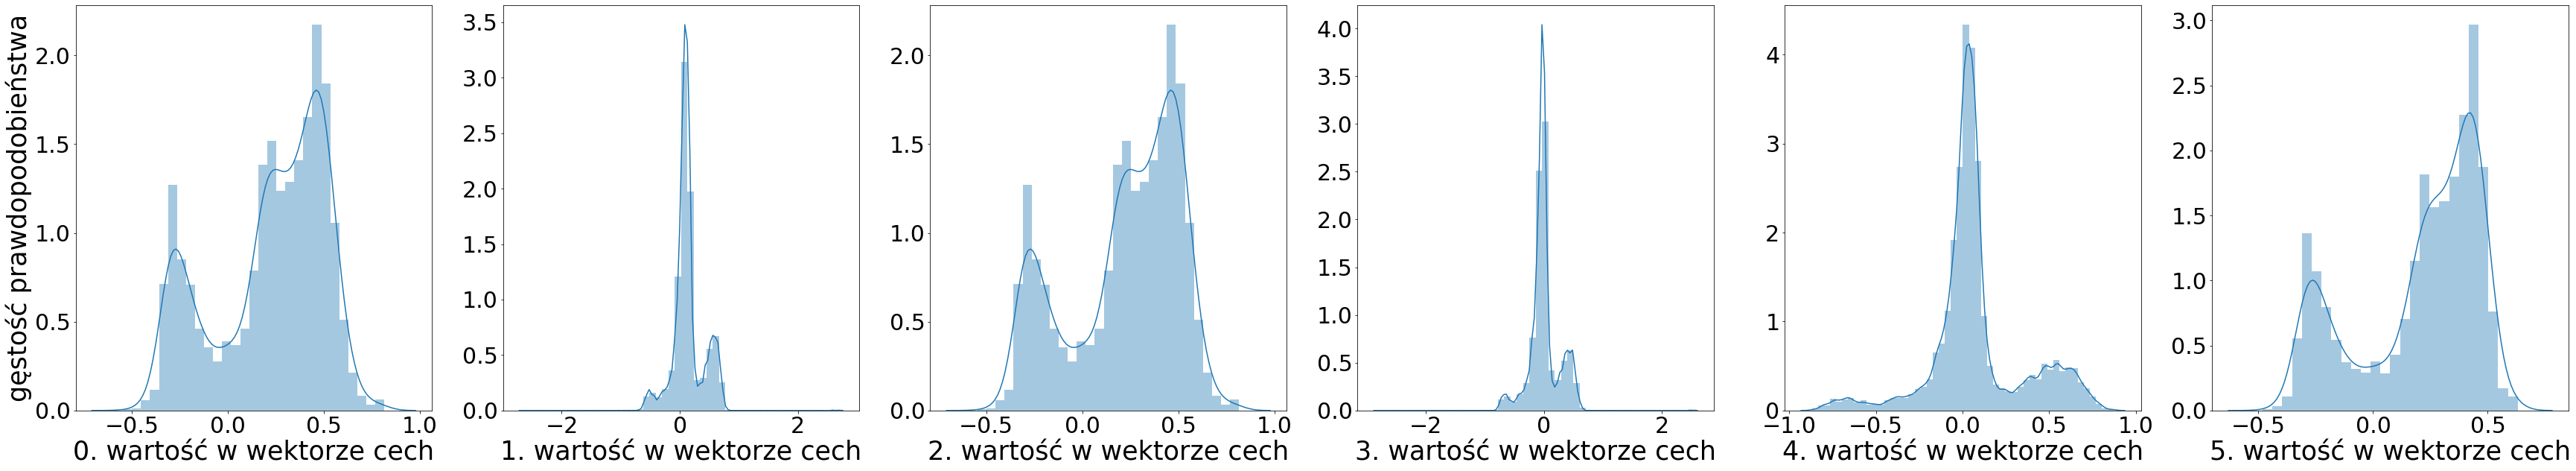

In [52]:
plot_dists(own_poses[:, :6], "angles_dist_own_dataset.png")

## MPIIGaze

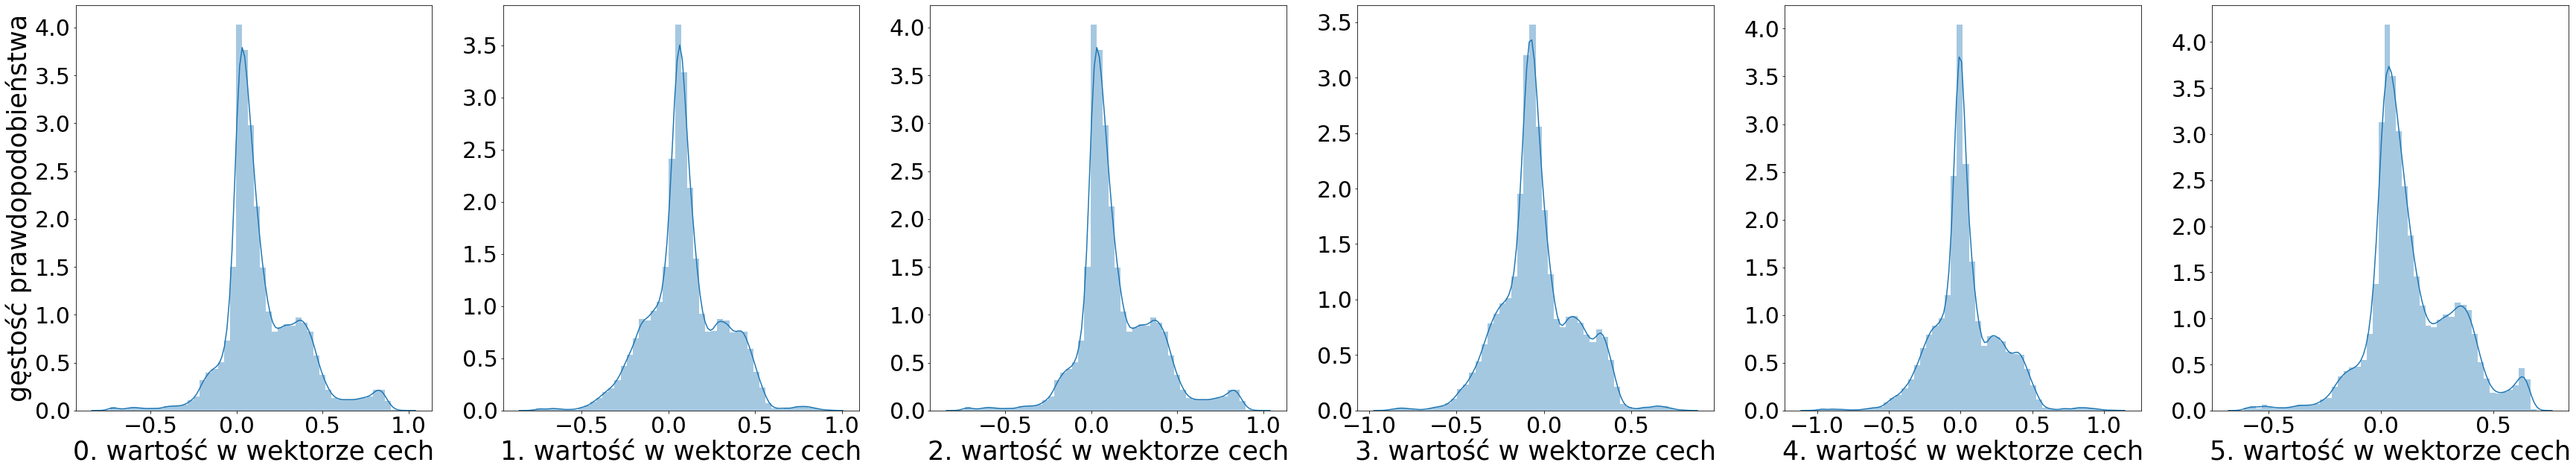

In [53]:
plot_dists(mpiigaze_poses[:, :6], "angles_dist_mpiigaze.png")

## Mpii Face Gaze

In [60]:
file_path = os.path.join(DATA_PATH, "mpii_face_gaze_processed", "all.npz")
mpii_face_gaze = np.load(file_path)
mpii_face_gaze_poses = mpii_face_gaze["pose"]

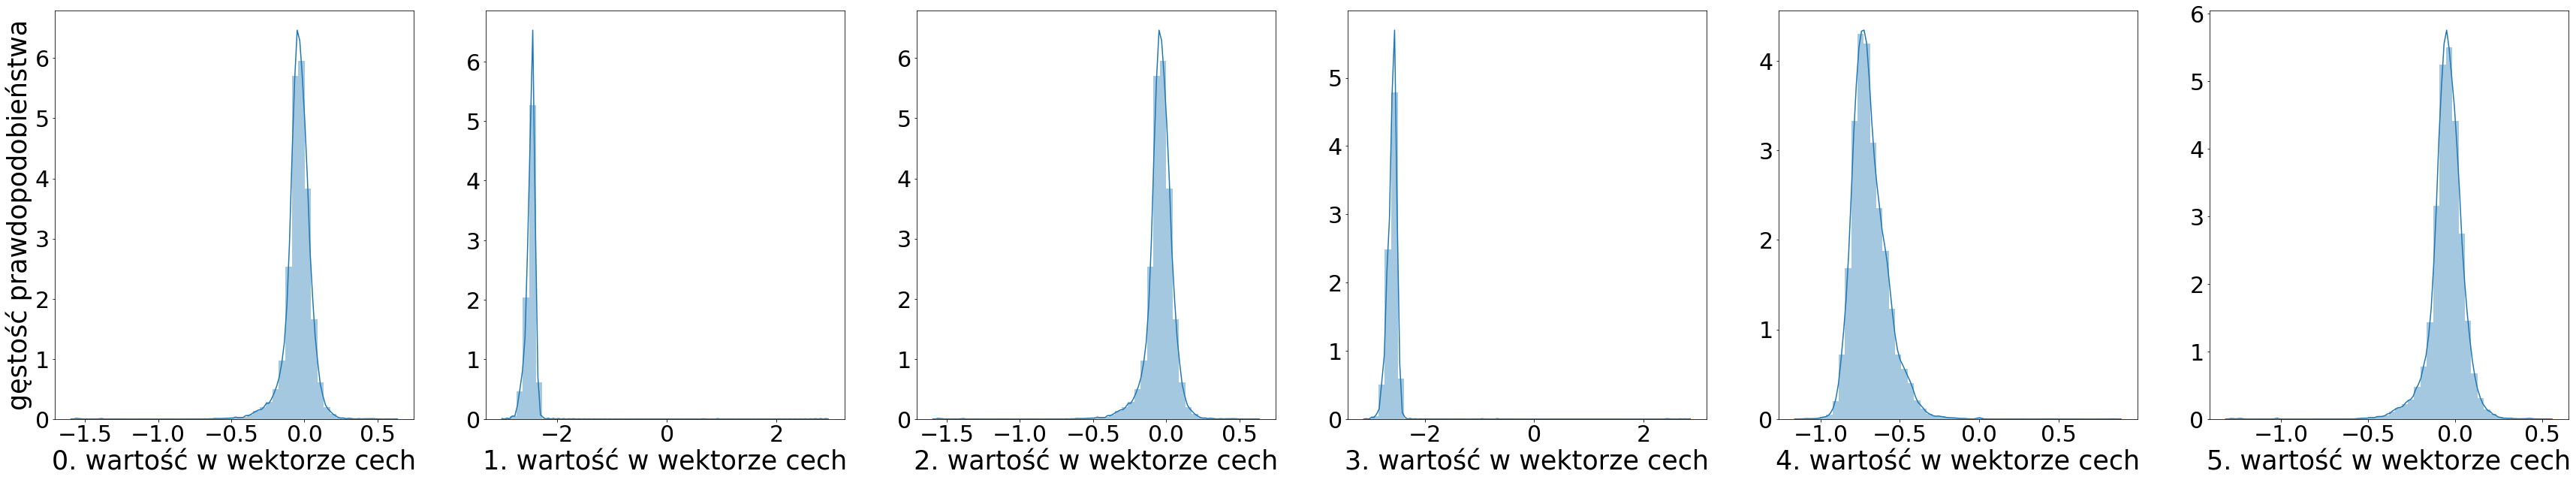

In [61]:
plot_dists(mpii_face_gaze_poses, "angles_dist_mpii_face_gaze.png")

In [56]:
file_path = os.path.join(DATA_PATH, "mpii_face_gaze_processed", "all_mouth_eyes_corners.npz")
mpii_face_gaze = np.load(file_path)
mpii_face_gaze_poses = mpii_face_gaze["pose"]

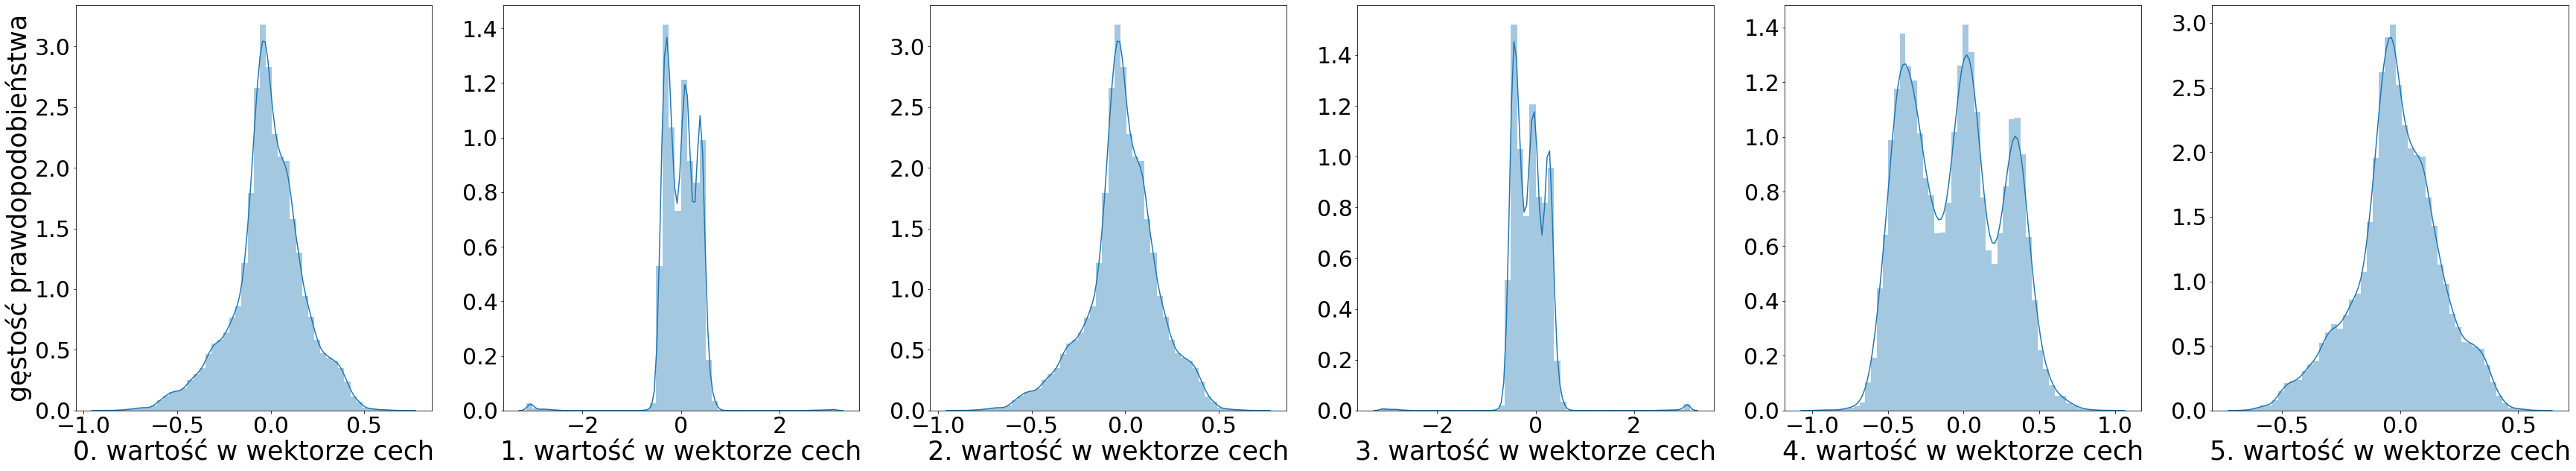

In [57]:
plot_dists(mpii_face_gaze_poses, "angles_dist_mpii_face_gaze_mouth_eyes_corners.png")

In [58]:
file_path = os.path.join(DATA_PATH, "mpii_face_gaze_processed", "all_mouth_eyes_corners_2.npz")
mpii_face_gaze = np.load(file_path)
mpii_face_gaze_poses = mpii_face_gaze["pose"]

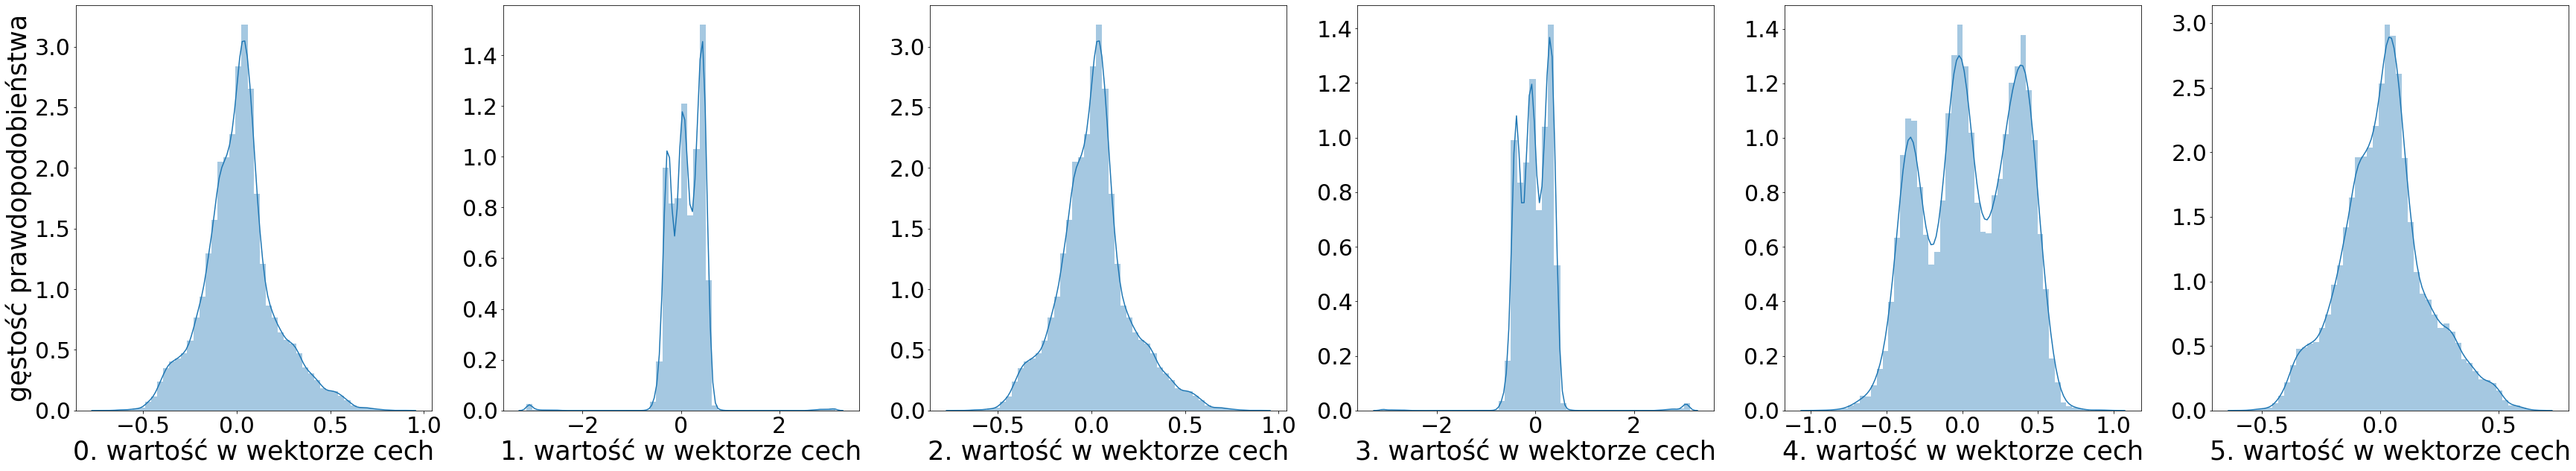

In [59]:
plot_dists(mpii_face_gaze_poses, "angles_dist_mpii_face_gaze_all_mouth_eyes_corners_2.png")